In [3]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [22]:
!jt -t monokai -T -N -kl

In [24]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

In [25]:
# Conexión a BD
# ==============================================================================
import pyodbc

In [27]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = '192.168.1.32,55078'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


In [28]:
dFechaInicio = '2020-01-01'
dFechaFin = '2020-12-31'

In [29]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,1))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

In [30]:
dfPlaga =  df

In [34]:
dfDagbertus = dfPlaga[dfPlaga["Plaga"] == 'BEMISIA TABACI']

In [36]:
dfDagbertus.head(5)

,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo_Plaga,Plaga,Caracteristica,Suma,Grado,Promedio,Porcentaje
3,fchavez,2020-05-27,VIRU - PALTO,10,T01,1053,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),42,1,--,--
6,hhonores,2020-05-20,VIRU - PALTO,10,T01,1054,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),6,1,--,--
9,hhonores,2020-06-04,VIRU - PALTO,10,T01,1054,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),24,1,--,--
13,fchavez,2020-06-19,VIRU - PALTO,10,T01,1053,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),24,1,--,--
16,hhonores,2020-06-22,VIRU - PALTO,10,T01,1054,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),18,1,--,--


In [38]:
for filtrado in dfDagbertus["Filtrado"].unique():
    print('***********************')
    print("Filtrado: " + filtrado)
    nCantidadFiltrado = dfDagbertus[dfDagbertus["Filtrado"] == filtrado].shape[0]
    print("Cantidad: " + str(nCantidadFiltrado))

***********************
Filtrado: 10
Cantidad: 35
***********************
Filtrado: 10N
Cantidad: 213
***********************
Filtrado: 11N
Cantidad: 30
***********************
Filtrado: 17
Cantidad: 958
***********************
Filtrado: 20
Cantidad: 843
***********************
Filtrado: 28
Cantidad: 101
***********************
Filtrado: 29
Cantidad: 85
***********************
Filtrado: 9N
Cantidad: 47


In [58]:
dfFiltradoEleg = dfDagbertus[dfDagbertus["Filtrado"] == "17"]

In [59]:
for lote in dfFiltradoEleg["Lote"].unique():
    print('*********************')
    print("Lote: " + lote)
    nCantidadLote = dfFiltradoEleg[dfFiltradoEleg["Lote"] == lote].shape[0]
    print("Cantidad: " + str(nCantidadLote))

*********************
Lote: 1704
Cantidad: 39
*********************
Lote: 1705
Cantidad: 40
*********************
Lote: 1708
Cantidad: 40
*********************
Lote: 1713
Cantidad: 40
*********************
Lote: 1716
Cantidad: 40
*********************
Lote: 1719
Cantidad: 40
*********************
Lote: 1722
Cantidad: 40
*********************
Lote: 1707
Cantidad: 39
*********************
Lote: 1710
Cantidad: 39
*********************
Lote: 1712
Cantidad: 40
*********************
Lote: 1715
Cantidad: 40
*********************
Lote: 1718
Cantidad: 40
*********************
Lote: 1721
Cantidad: 40
*********************
Lote: 1724
Cantidad: 40
*********************
Lote: 1702
Cantidad: 39
*********************
Lote: 1703
Cantidad: 40
*********************
Lote: 1701
Cantidad: 41
*********************
Lote: 1706
Cantidad: 40
*********************
Lote: 1709
Cantidad: 41
*********************
Lote: 1711
Cantidad: 40
*********************
Lote: 1714
Cantidad: 40
*********************
Lote: 1717
C

In [60]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [61]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [62]:
result = dfFiltradoEleg
arrFiltrados = result['Filtrado'].unique()
print(arrFiltrados)

['17']


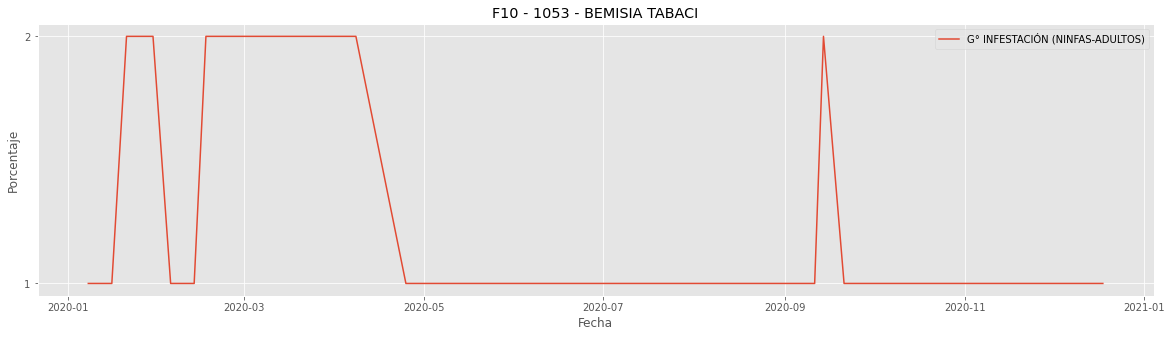

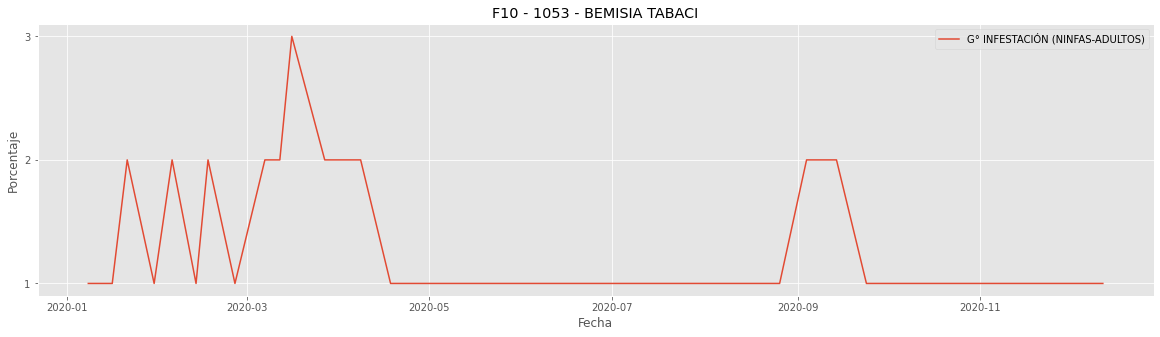

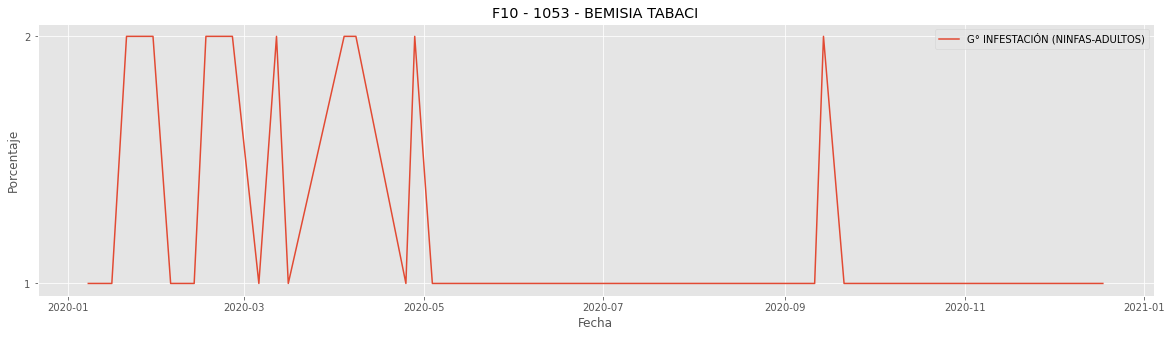

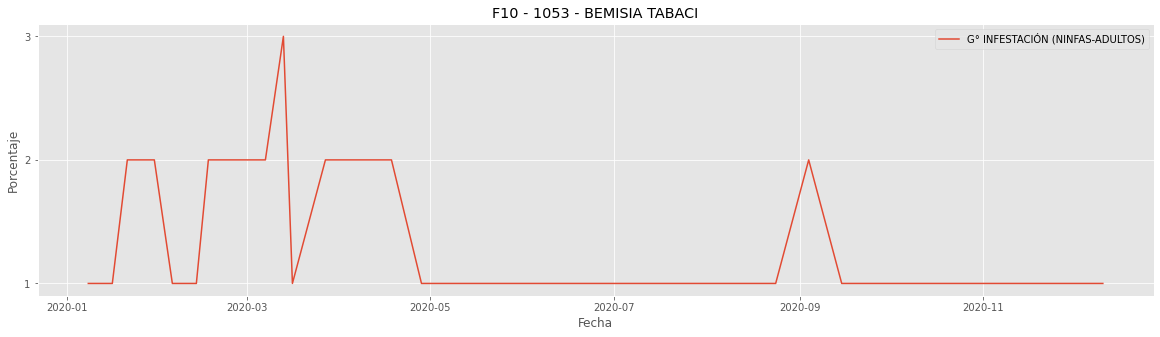

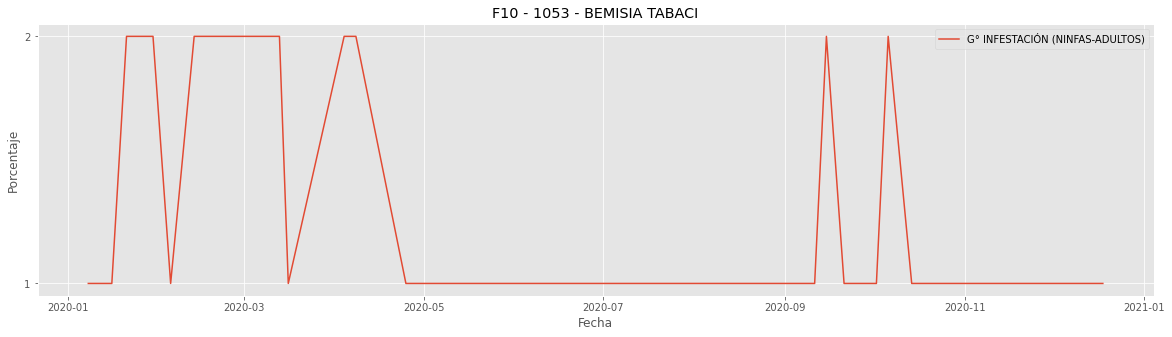

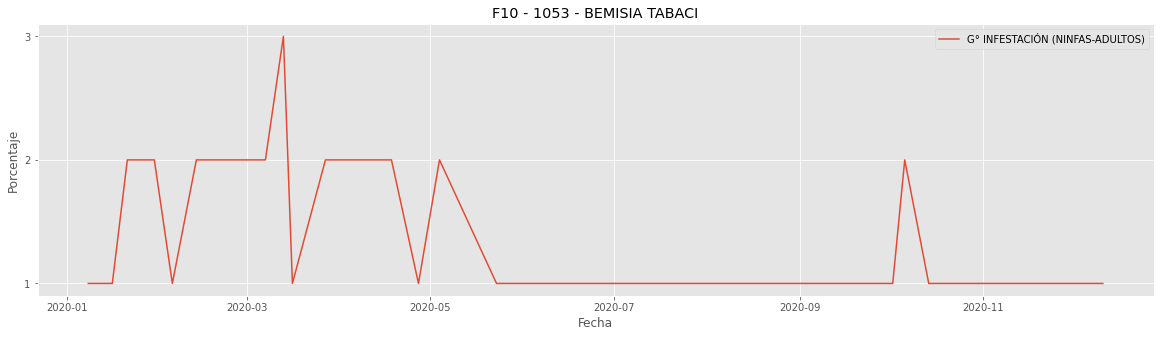

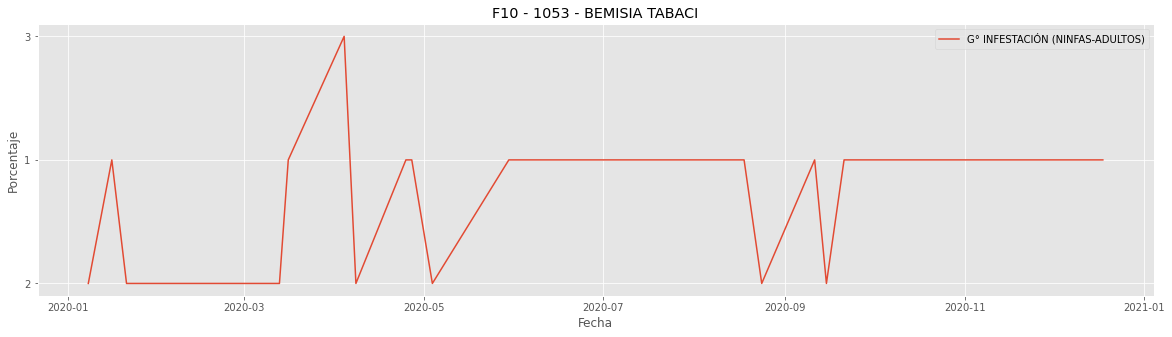

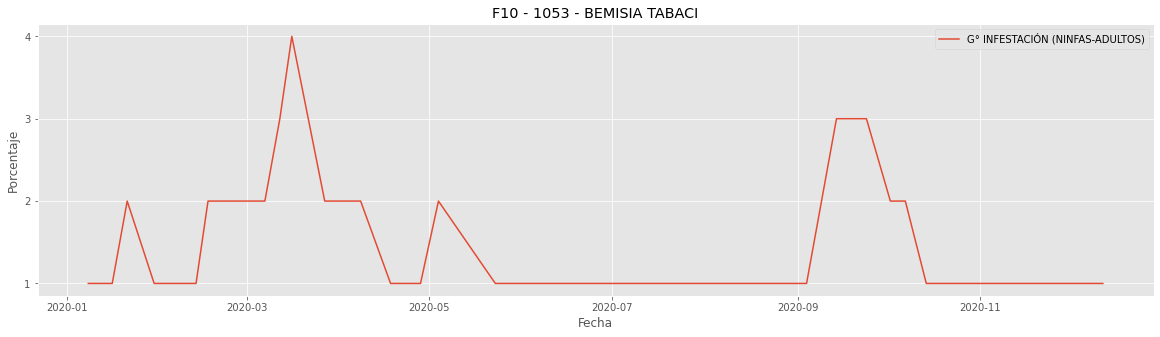

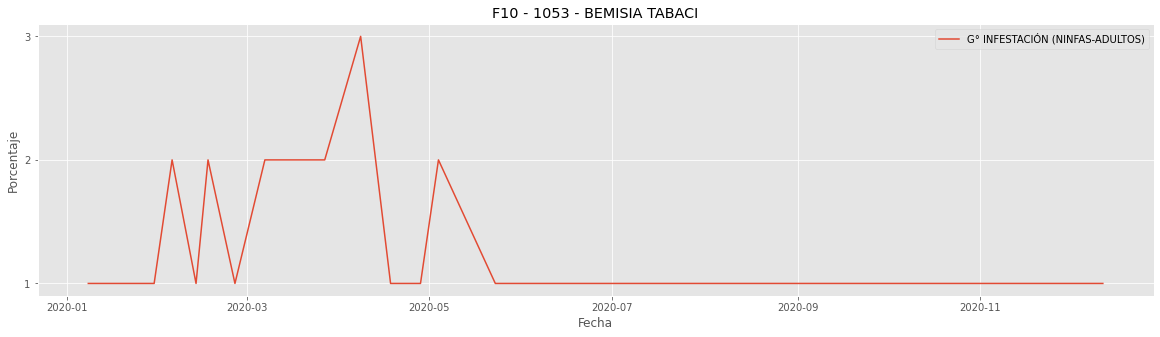

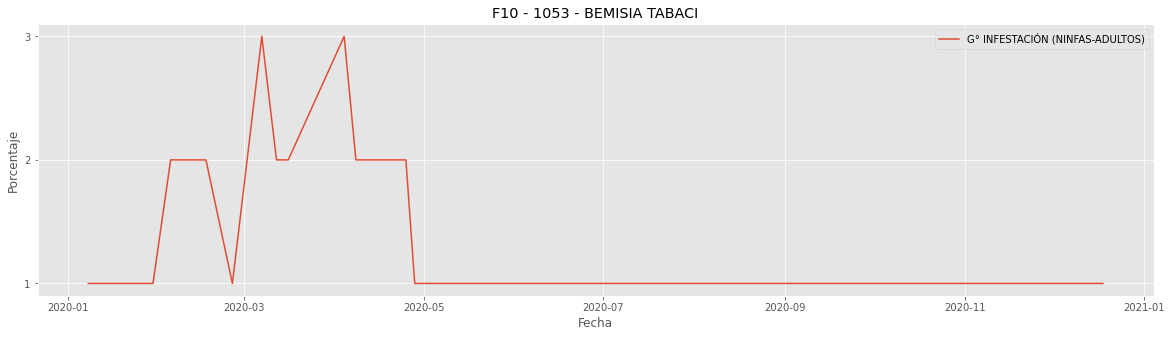

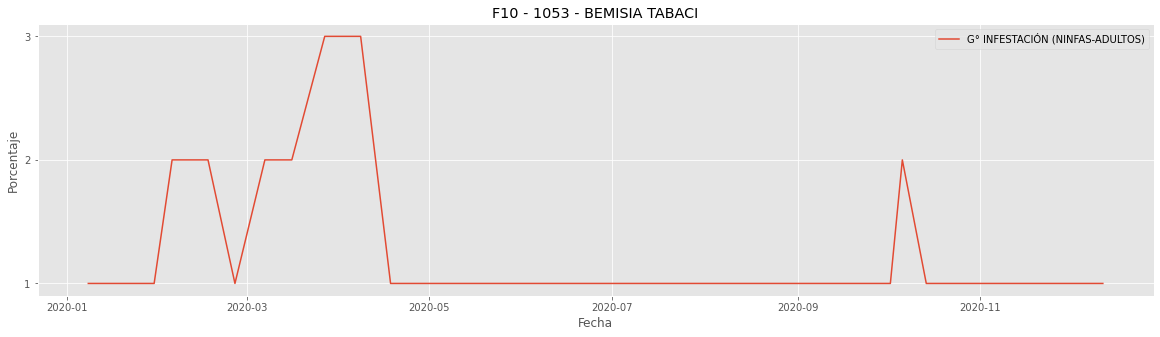

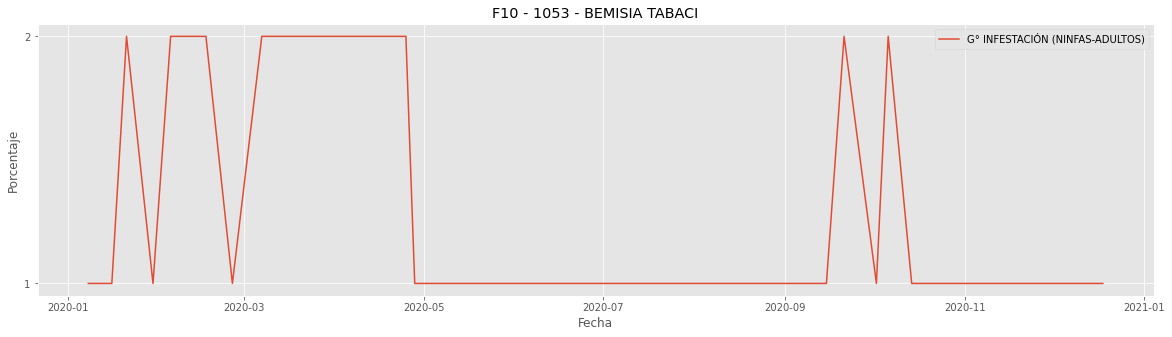

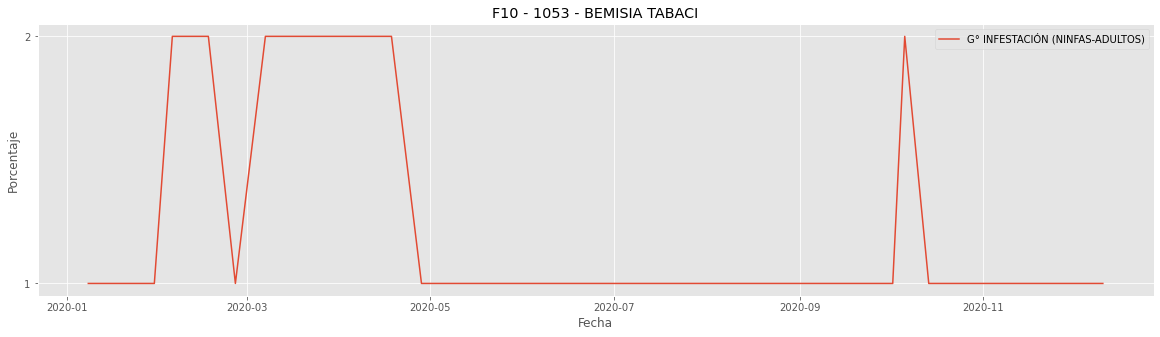

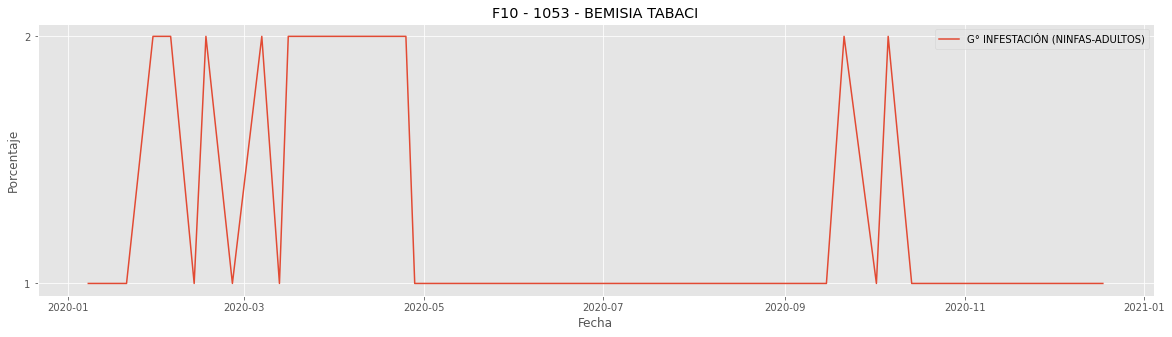

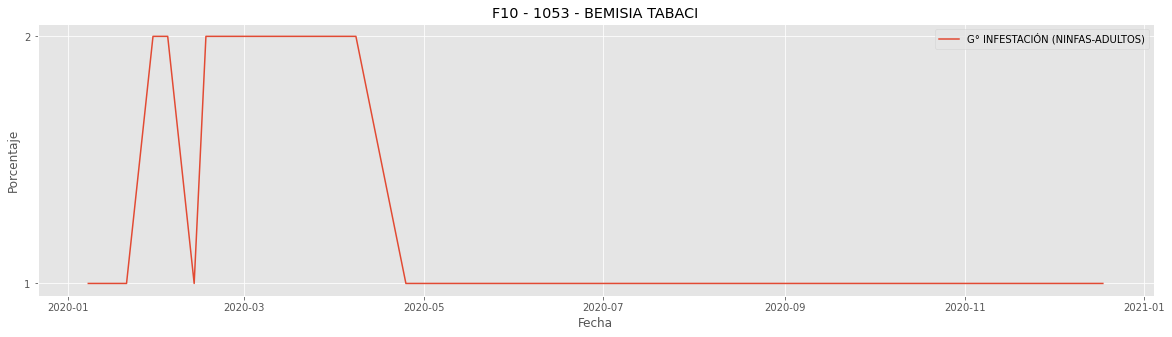

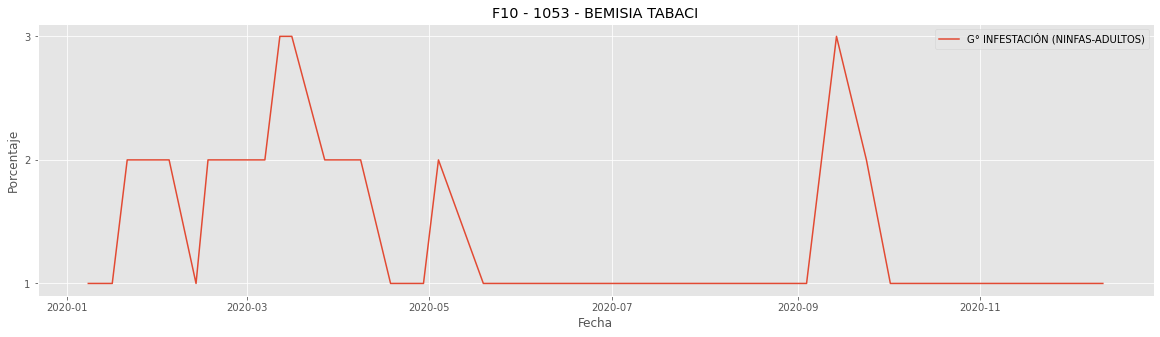

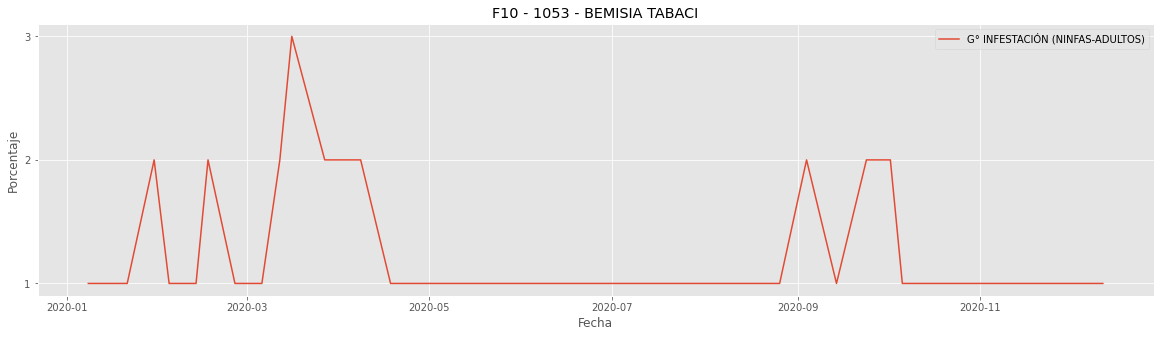

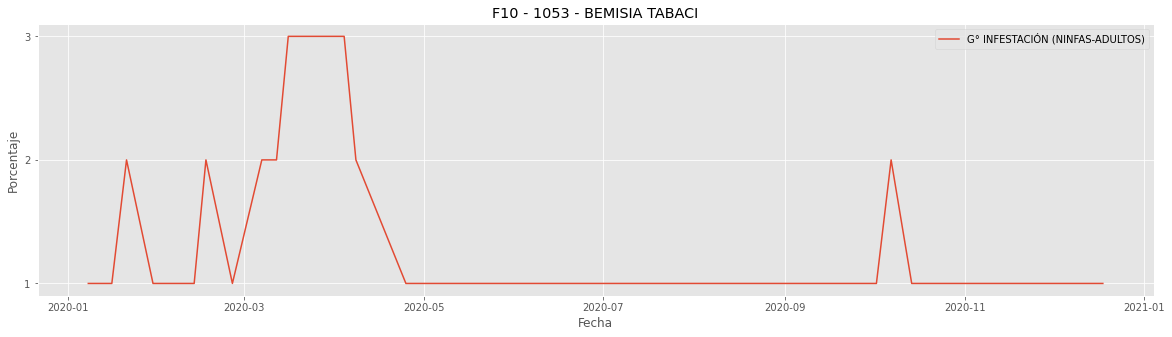

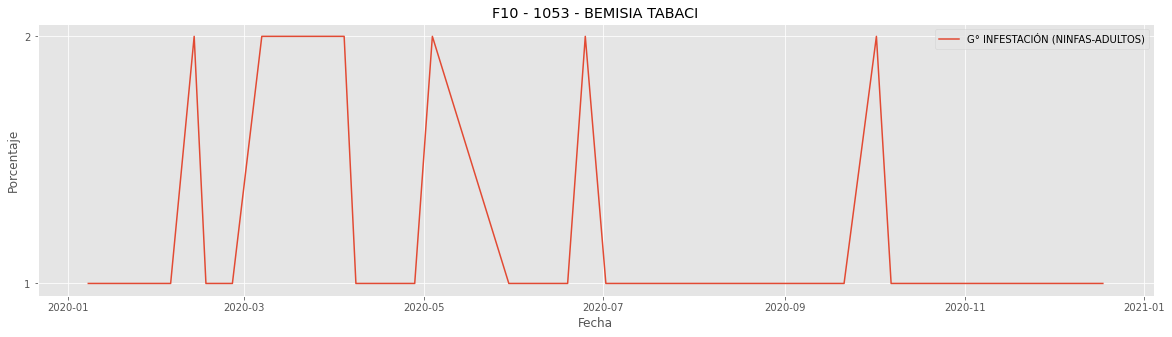

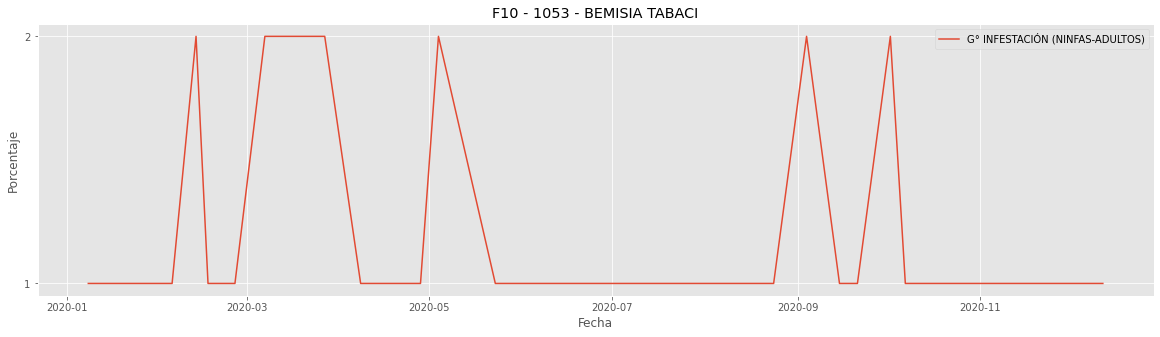

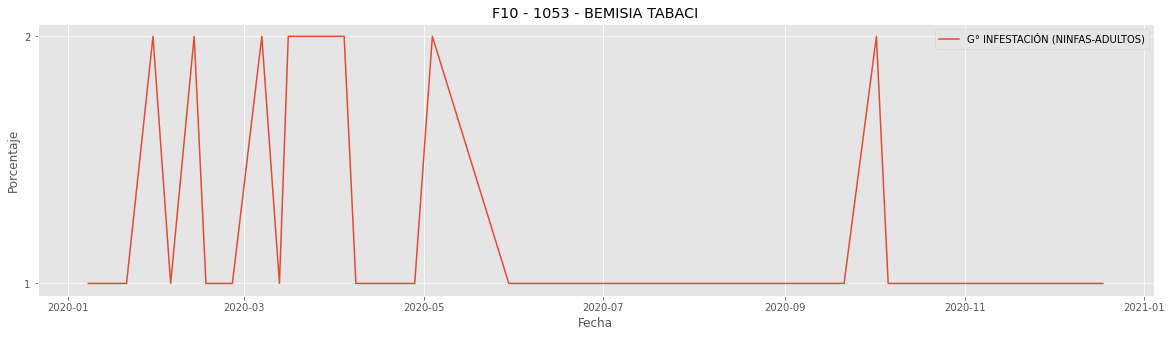

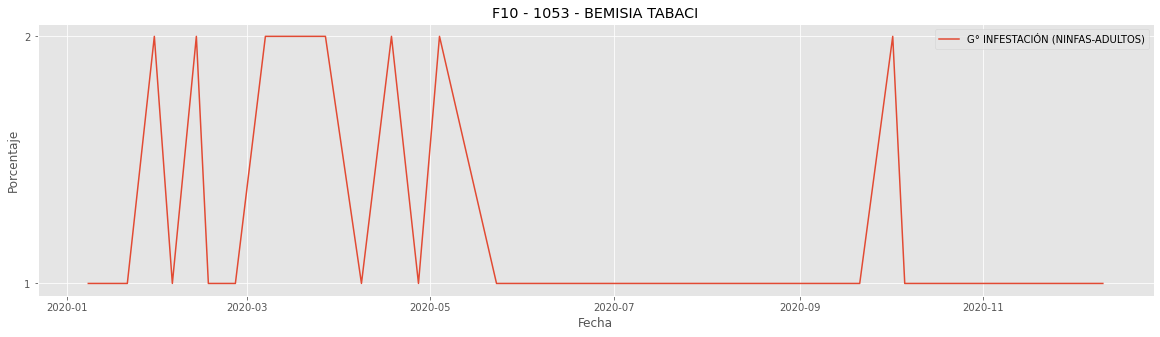

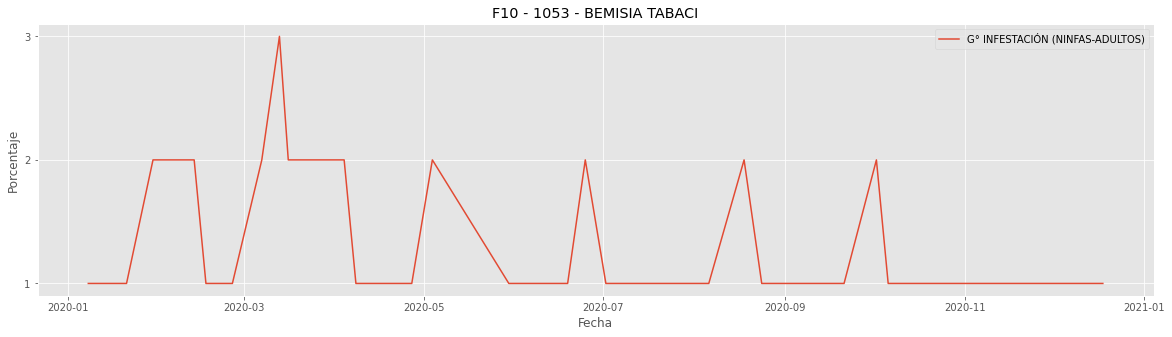

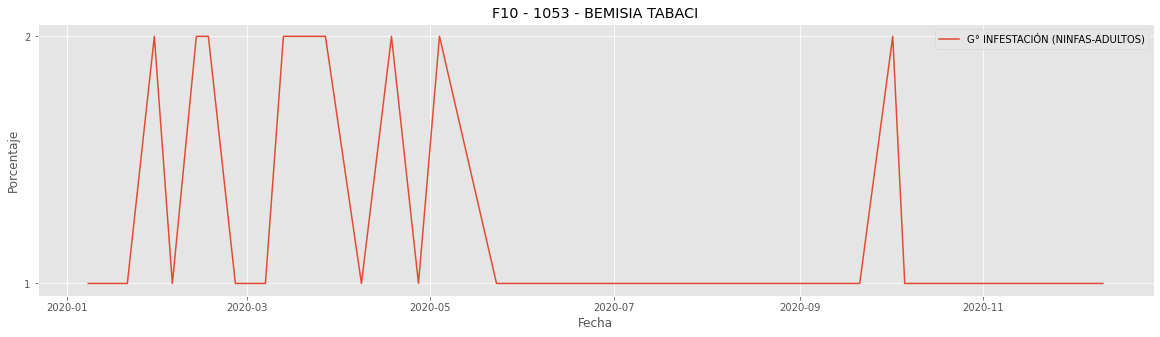

In [64]:
for filtrado in arrFiltrados:
    dfFiltrado = result[result['Filtrado'] == filtrado]
    arrTurnos = dfFiltrado['Turno'].unique()
    for turno in arrTurnos:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        
        for lote in arrLote:   
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagas = dfLote['Plaga'].unique()
           
            for plaga in arrPlagas:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrCaracteristica = dfPlaga['Caracteristica'].unique()      
                
                for caracteristica in arrCaracteristica:   
                    
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica].sort_values(by=['Fecha'])
                                       
                    pd.set_option('display.max_rows', 1000)
                
                    x = dfCarac['Fecha']
                    y = dfCarac['Grado']
                    
                    #print(dfCarac[["Fecha","Plaga","Grado"]])
                    plt.title('F10 - {} - {}'.format(1053,plaga))    
                    plt.rcParams["figure.figsize"] = (20,5)
                    plt.xlabel('Fecha')
                    plt.ylabel('Porcentaje')                    
                    plt.plot(x,y, label = caracteristica)
                    plt.legend()
                 
                    plt.show()